In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

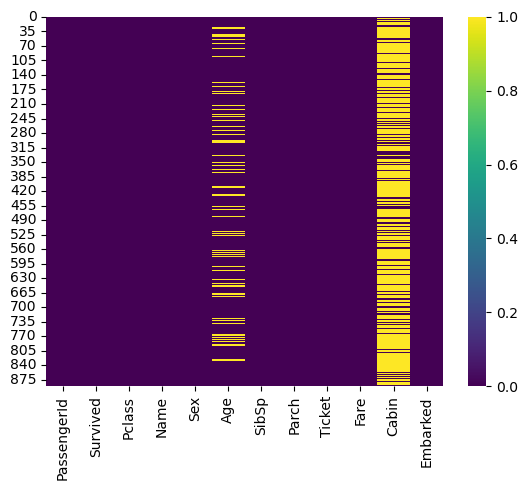

In [4]:
sns.heatmap(data.isnull(), cmap='viridis')

In [6]:
data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [13]:
data.drop(columns=['Cabin'], inplace=True)

In [26]:
age=np.random.randint(data['Age'].mean()-data['Age'].std(), data['Age'].mean()+data['Age'].std(), 177)

In [36]:
data['Age'][data['Age'].isnull()]=age

C:\Users\Dell\AppData\Local\Temp\ipykernel_7668\1256817773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull()]=age


<Axes: >

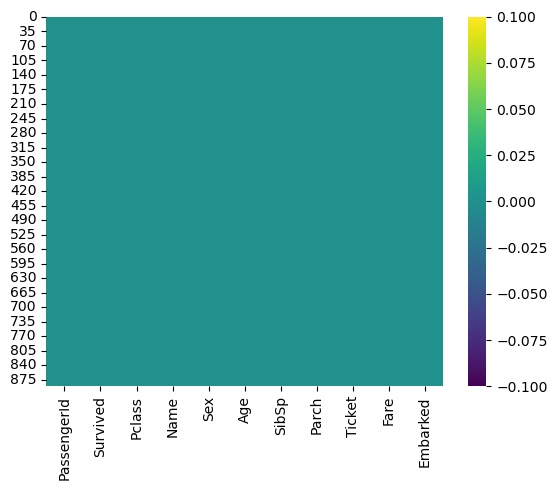

In [38]:
sns.heatmap(data.isnull(), cmap='viridis')

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Survival by Sex')

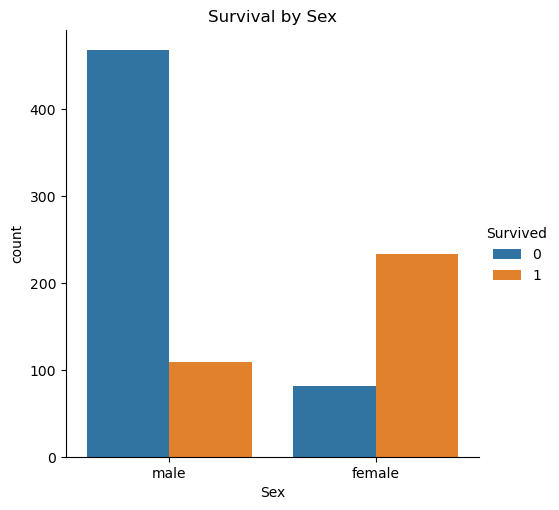

In [66]:
sns.catplot(x='Sex', hue='Survived', data=data, kind='count')
plt.title('Survival by Sex')

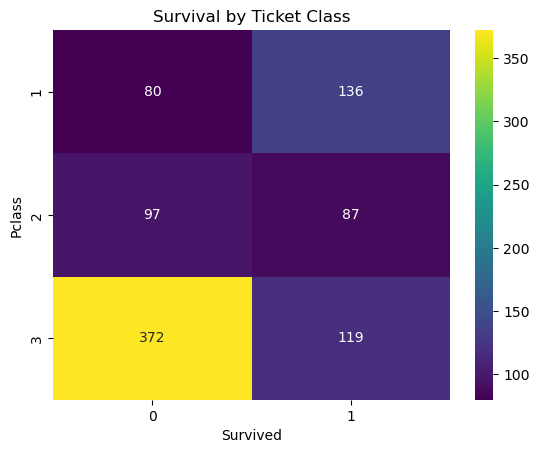

In [69]:
group=data.groupby(['Pclass', 'Survived'])
pclass=group.size().unstack()


sns.heatmap(pclass, annot=True, fmt='d', cmap='viridis',)
plt.title('Survival by Ticket Class')
plt.show()

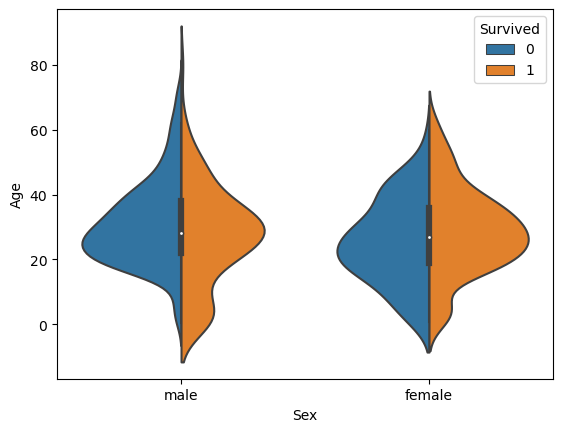

In [73]:
sns.violinplot(x='Sex', y='Age', data=data, hue='Survived', split=True)
plt.show()

In [74]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']

data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

<Axes: xlabel='Fare_Range', ylabel='Survived'>

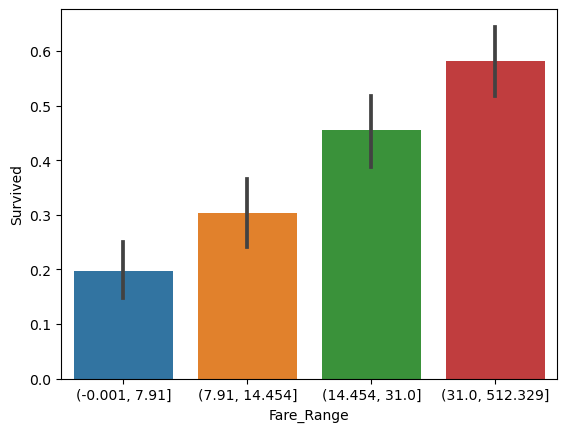

In [101]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)


sns.barplot(x='Fare_Range', y='Survived', data=data)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

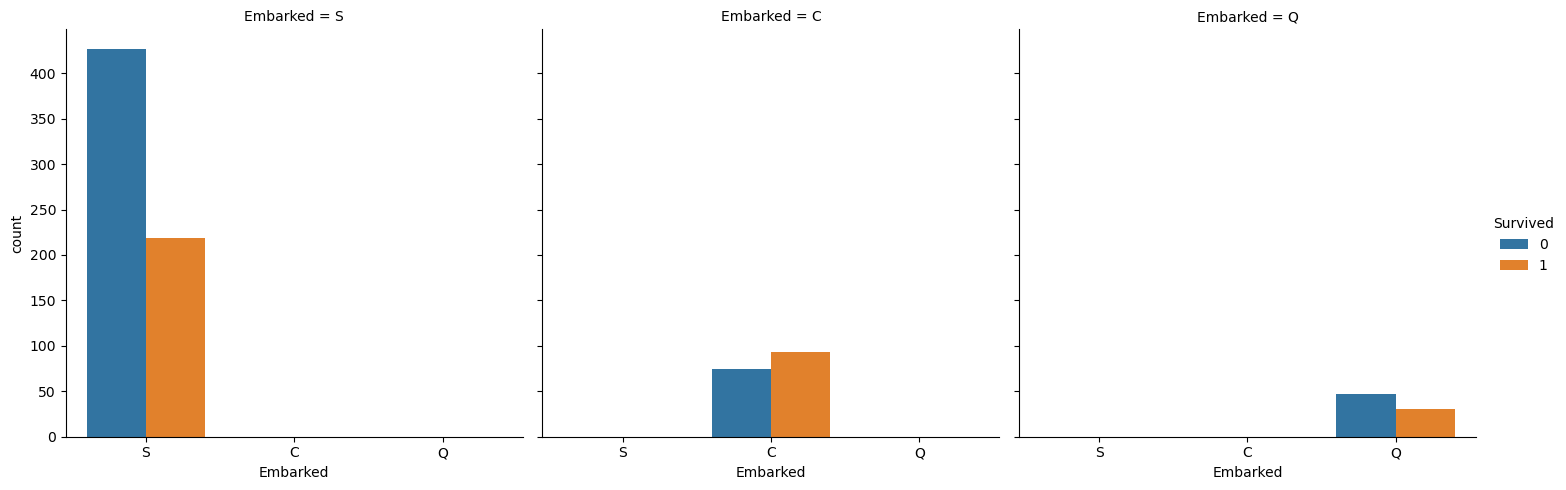

In [105]:
sns.catplot(x='Embarked', hue='Survived', data=data, kind='count', col='Embarked')
plt.plot()